In [20]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [22]:
# 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [24]:
df = df.drop(columns=['id', 'date', 'zipcode'])
#df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 'M', 'F', 'I' → 정수 라벨

In [26]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
# 입력(X)과 출력(y) 분리
X = df.drop('price', axis=1)
y = df['price'].astype(int) - 1  # 클래스 0,1,2로 변환

In [30]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [38]:
# 모델 구성
from tensorflow.keras import Input
from tensorflow import keras

model = keras.Sequential([
    Input(shape=(X_train.shape[1],)),             
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [40]:
# 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [42]:
# 모델 학습
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 435937673216.0000 - mae: 541878.8125 - val_loss: 388864311296.0000 - val_mae: 528347.8125
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 409339625472.0000 - mae: 526326.2500 - val_loss: 328802566144.0000 - val_mae: 484771.9062
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 323485761536.0000 - mae: 464577.4062 - val_loss: 219784708096.0000 - val_mae: 389245.4375
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 201272672256.0000 - mae: 360299.5312 - val_loss: 124665544704.0000 - val_mae: 273565.5938
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 118606086144.0000 - mae: 259481.3750 - val_loss: 82593816576.0000 - val_mae: 215557.5938
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 83072327680.0000 - mae: 210892.0781 - val_loss: 70768795648.0000 - val_mae: 199474.6562
Epoch 7/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73022996480.0000 - mae: 196817.4062 

In [43]:
# 예측
y_pred = model.predict(X_test).flatten()

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [50]:
# 평가 지표 출력
print("=== 딥러닝 회귀 모델 성능 ===")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

=== 딥러닝 회귀 모델 성능 ===
MAE: 113026.87626865025
MSE: 36541716348.27267
R² Score: 0.7582847476005554


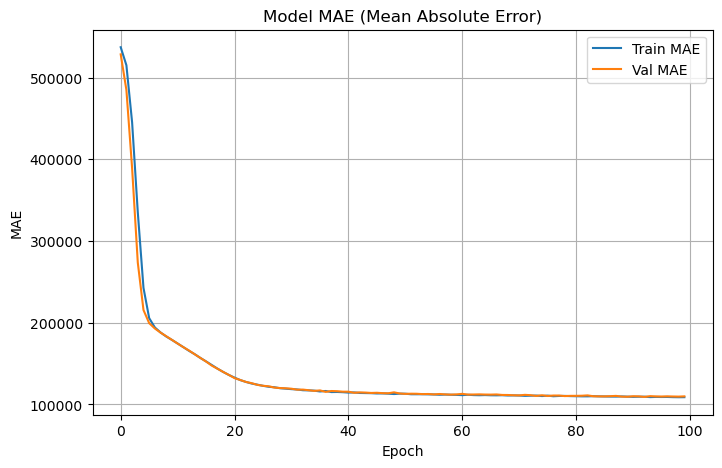

In [54]:
# MAE 시각화 (정확도에 해당)
plt.figure(figsize=(8, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE (Mean Absolute Error)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

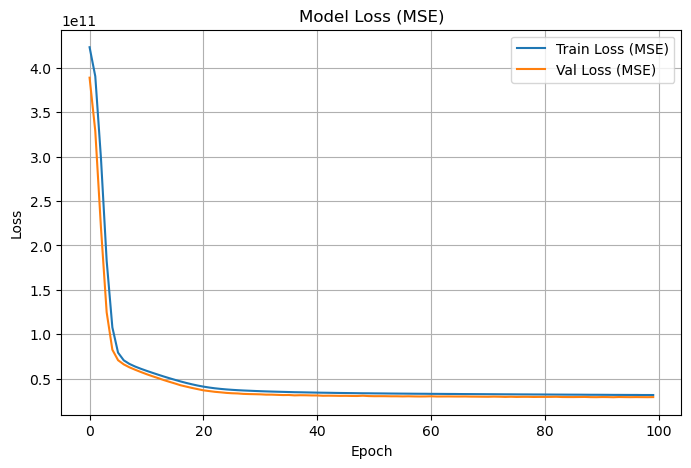

In [56]:
# MSE (Loss) 시각화
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

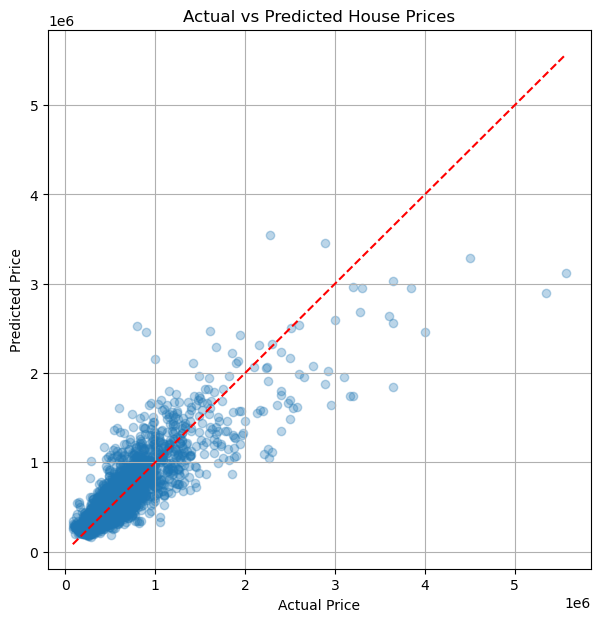

In [58]:
# 실제 vs 예측 산점도
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 대각선
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


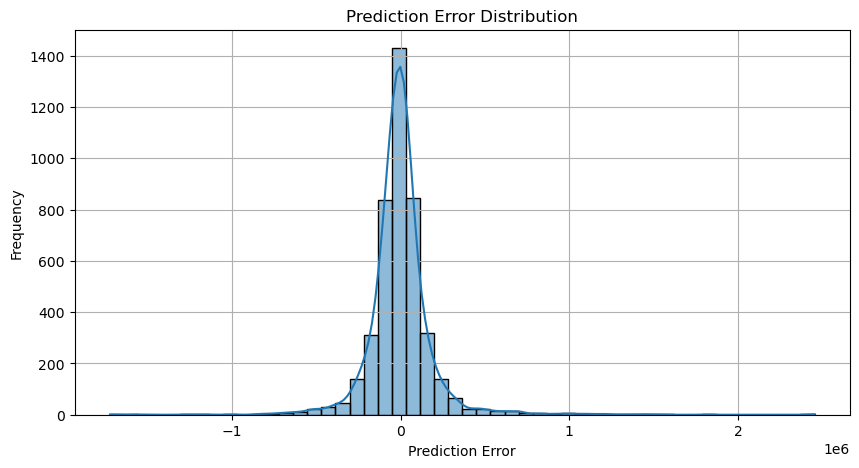

In [60]:
# 예측 오차 분포 시각화
errors = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=50, kde=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()